# Lab 8: Define and Solve an ML Problem of Your Choosing

In [20]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [21]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose bookReviewsData.csv.
2. I will be predicting whether the review is positive or not. The label is 'Positive Review'.
3. This is a supervised learning problem. This is a binary classification problem.
4. My feature is 'Review'.
5. This is an important problem because this is an example of sentiment analysis, which automatically assesses customer feed back to help a business prioritize product improvements, highlight positive testimonials, and detect issues quickly.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [22]:
df.shape

(1973, 2)

In [23]:
list(df.columns)

['Review', 'Positive Review']

In [24]:
df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [25]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

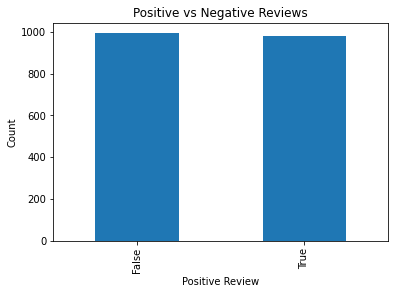

In [26]:
df['Positive Review'].value_counts().plot(kind='bar', title='Positive vs Negative Reviews')
plt.xlabel('Positive Review')
plt.ylabel('Count')
plt.show()

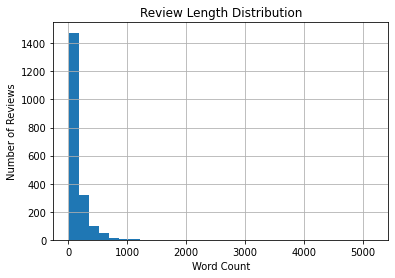

In [27]:
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
df['review_length'].hist(bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.show()

* The dataset contains 1973 book reviews with two columns: 'Review' (text) and 'Positive Review' (boolean label).
* There are no missing values, which means the data is clean and ready for processing
* The label distribution is nearly balanced, with a roughly equal number of positive and negative reviews. This is ideal for training a binary classification model without having to account for class imbalance.
* The review length distribution shows that most reviews are relatively short, with the majority containing fewer than 200 words. A few outliers exist with reviews that are significantly longer.
* This insight helps inform preprocessing steps. I may want to cap maximum review length during tokenization to avoid skew from overly long samples.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

* My feature list still only has one variable 'Review'.
* For data preparation, I will clean and preprocess the text data by:
    * lowercasing all text
    * removing punctuation and special characters
    * tokenizing the reviews
    * converting text into numerical features using TF-IDF Vectorization
* I plan to use a Logistic Regression model as my baseline because it performs well on high-dimensional sparse data like TF-IDF.
* To train and evaluate my model:
    * I will split the data into a training set and a test set
    * I will use cross-validation on the training set to tune hyperparameters and prevent overfitting.
    * I will evaluate performance using metrics like accuracy, precision, recall, and F1 score.
    * Based on results, I may improve the model by adjusting the preprocessing steps, trying different classifiers, or using techniques like n-grams in TF-IDF.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [28]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#1 Done
#2 Done
#3 Done
#4 Done
#5 Done
              precision    recall  f1-score   support

       False       0.89      0.86      0.88       196
        True       0.87      0.89      0.88       199

    accuracy                           0.88       395
   macro avg       0.88      0.88      0.88       395
weighted avg       0.88      0.88      0.88       395

#6 Done


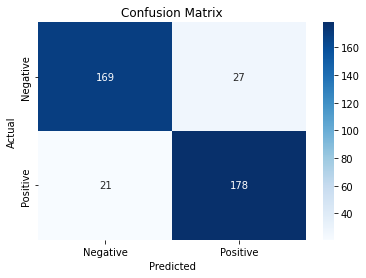

#7 Done


In [34]:
#1 Preprocessing (lowercase + remove punctuation)
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text
print("#1 Done")


#2 Apply cleaning to the 'Review' column
df['cleaned_review'] = df['Review'].apply(clean_text)
print("#2 Done")

#3 TF-IDF Vectorization with bigrams and min_df
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=4)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['Positive Review']
print("#3 Done")

#4 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print("#4 Done")

#5 Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("#5 Done")

#6 Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("#6 Done")

#7 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("#7 Done")

To evaluate my sentiment analysis model, I used Logistic Regression with TF-IDF vectorization on the cleaned review text. After experimenting with different parameters, I found that using n-grams up to trigrams (ngram_range=(1,3)) and filtering out very rare terms with min_df=4 produced the best results. This version achieved an accuracy of 88% with balanced precision and recall for both positive and negative classes. The confusion matrix confirmed that the model made relatively few classification errors. These results suggest that simple preprocessing and feature engineering choices can significantly improve model performance, even with a straightforward linear model like Logistic Regression.